In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# entropy vs p plots

In [2]:
table=pd.read_csv('table_entropy.csv')
table

,Rule,Class,"p=0, c=1 no translation","p=0, c=1, left translation","p=0, c=1, right translation","p=0, c=1, left-2 translation","p=0, c=1, right-2 translation"
0,0,1,2.220446e-16,0.000000e+00,-1.110223e-15,0.000000e+00,0.000000e+00
1,1,2,-1.322436e+01,-9.536466e+00,-1.803635e+01,-1.390847e+01,-1.390847e+01
2,2,2,0.000000e+00,3.822451e-01,-1.110223e-16,8.881784e-16,8.881784e-16
3,3,2,-inf,-1.110223e-15,-1.334017e+01,-2.038569e+01,-2.038569e+01
4,4,2,4.812118e-01,-2.220446e-16,8.881784e-16,4.812118e-01,4.812118e-01
...,...,...,...,...,...,...,...
83,178,2,0.000000e+00,4.000138e-09,2.217789e-08,0.000000e+00,0.000000e+00
84,184,2,6.971369e-09,4.812118e-01,4.812118e-01,4.370844e-09,4.370844e-09
85,200,1,5.623991e-01,8.881784e-16,4.440892e-16,5.623991e-01,5.623991e-01
86,204,2,6.931472e-01,0.000000e+00,0.000000e+00,6.931472e-01,6.931472e-01


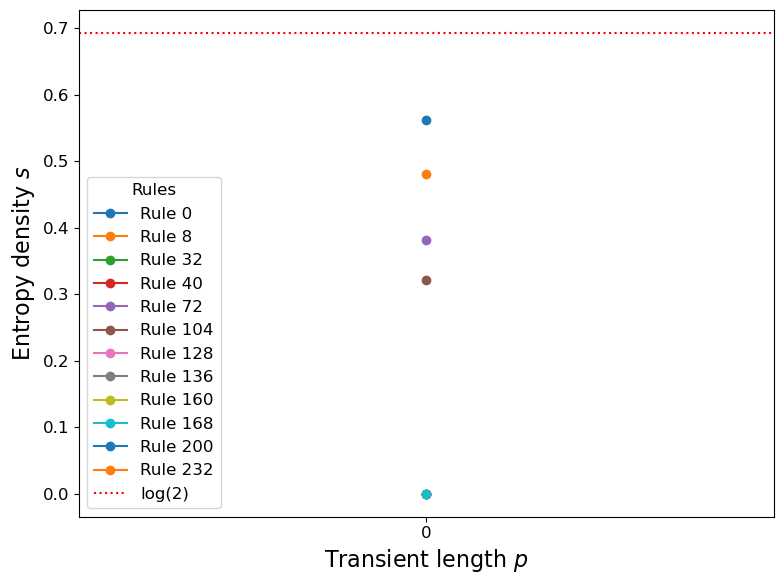

In [3]:
# Class 1 all rules vs p
class_1 = [0, 8, 32, 40, 72, 104, 128, 136, 160, 168, 200, 232]
max_p = 1
c=1

plt.figure(figsize=(8, 6))  # Make the figure a bit larger
plt.rcParams.update({'font.size': 12})  # Increase font size

for rule in class_1:
    rule_df = table[table['Rule'] == rule]
    entropy = []
    for p in range(max_p):
        value = float(rule_df[f'p={p}, c={c} no translation'].iloc[0])
        entropy.append(value)
    plt.plot(np.arange(max_p), entropy, marker='.', label=f'Rule {rule}', markersize=12)

plt.axhline(np.log(2), color='red', linestyle=':', label='log(2)')

plt.xlabel(r'Transient length $p$', fontsize=16)
plt.ylabel(r'Entropy density $s$', fontsize=16)
plt.xticks(np.arange(0, max_p, 1))  # ticks at 0,1,2,...max_p
#plt.yticks(np.arange(0, 1.1, 0.1)) 
plt.legend(title='Rules', fontsize=12)      
plt.tight_layout()
plt.show()
#plt.savefig('class_1_entropy_vs_p.png', dpi=300, bbox_inches='tight')


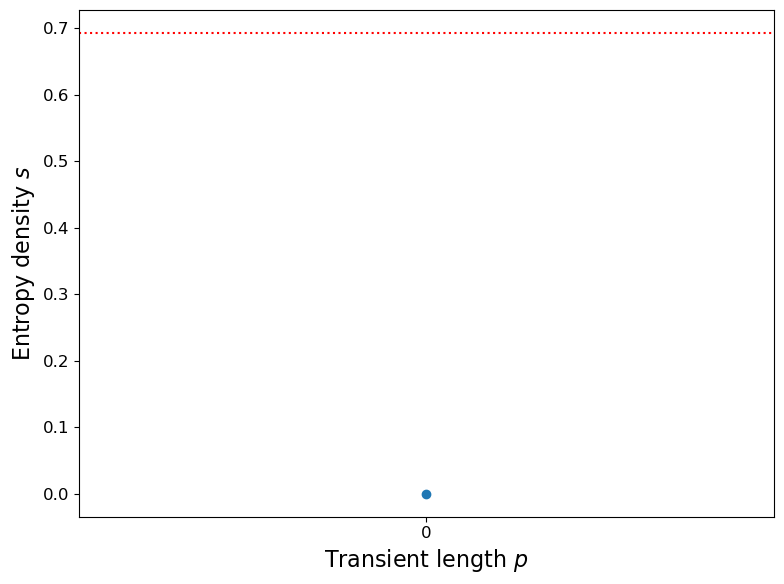

In [4]:
# Class 2 rule 6
rule=6
max_p = 1
c=1

plt.figure(figsize=(8, 6))  # Make the figure a bit larger
plt.rcParams.update({'font.size': 12})  # Increase font size

rule_df = table[table['Rule'] == rule]
entropy = []
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c}, left translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='.', markersize=12)

plt.axhline(np.log(2), color='red', linestyle=':', label='log(2)')

plt.xlabel(r'Transient length $p$', fontsize=16)
plt.ylabel(r'Entropy density $s$', fontsize=16)
plt.xticks(np.arange(0, max_p, 1))  # ticks at 0,1,2,...max_p
#plt.yticks(np.arange(0, 1.1, 0.1)) 
plt.tight_layout()
plt.show()
#plt.savefig('rule_6.png', dpi=300, bbox_inches='tight')


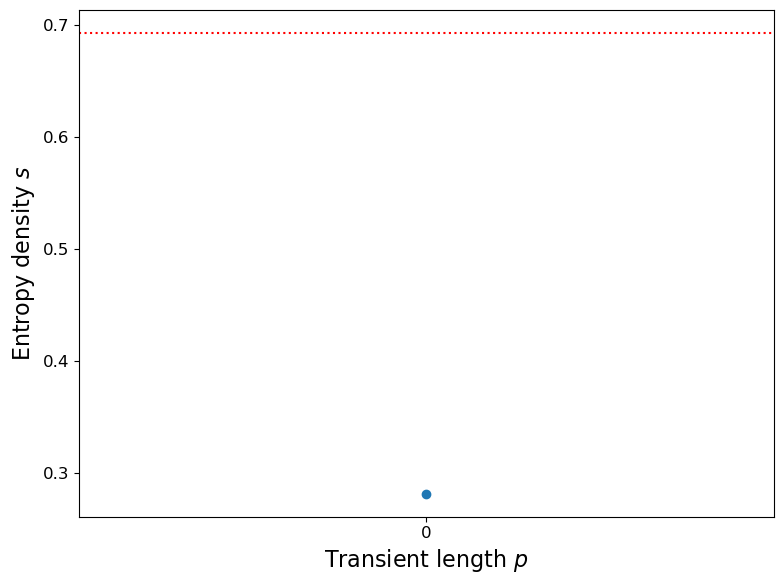

In [5]:
# Class 2 rule 41
rule=41
max_p = 1
c=1

plt.figure(figsize=(8, 6))  # Make the figure a bit larger
plt.rcParams.update({'font.size': 12})  # Increase font size

rule_df = table[table['Rule'] == rule]
entropy = []
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c}, left translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='.', markersize=12)

plt.axhline(np.log(2), color='red', linestyle=':', label='log(2)')

plt.xlabel(r'Transient length $p$', fontsize=16)
plt.ylabel(r'Entropy density $s$', fontsize=16)
plt.xticks(np.arange(0, max_p, 1))  # ticks at 0,1,2,...max_p
#plt.yticks(np.arange(0, 1.1, 0.1)) 
plt.tight_layout()
plt.show()
#plt.savefig('rule_41.png', dpi=300, bbox_inches='tight')


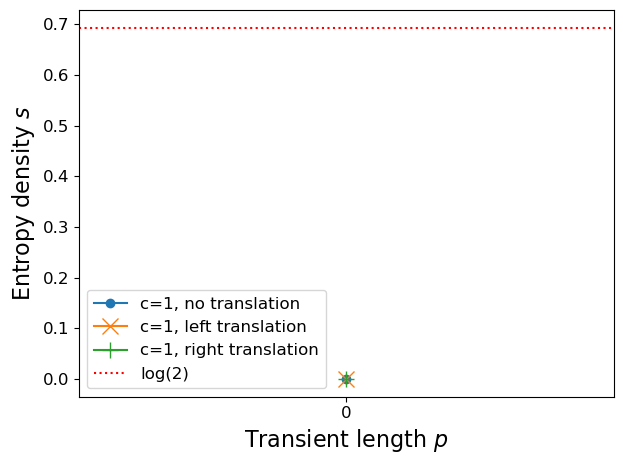

In [6]:
# Entropy as function of  for different neighborhoods, rule 146
rule=146
max_p = 1
c=1 # Change to 2
rule_df = table[table['Rule'] == rule]
entropy = []

plt.rcParams.update({'font.size': 12})  # Increase font size

for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c} no translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='.', label=f'c={c}, no translation', markersize=12)

entropy = []
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c}, left translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='x', label=f'c={c}, left translation', markersize=12)

entropy = []
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c}, right translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='+', label=f'c={c}, right translation',markersize=12)

plt.axhline(np.log(2), color='red', linestyle=':', label='log(2)')

plt.xlabel(r'Transient length $p$', fontsize=16)
plt.ylabel(r'Entropy density $s$', fontsize=16)
plt.xticks(np.arange(0, max_p, 1))  # ticks at 0,1,2,...max_p
#plt.yticks(np.arange(0, 1.1, 0.1)) 
plt.legend(fontsize=12)      
plt.tight_layout()
plt.show()

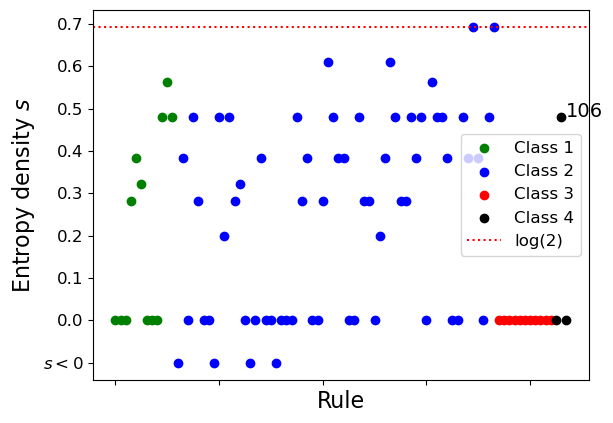

In [7]:
# max entropy all rules
class_1 = [0, 8, 32, 40, 72, 104, 128, 136, 160, 168, 200, 232]
class_2 = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 19, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 46, 50, 51, 56, 57, 58, 62, 73, 74, 76, 77, 78, 94, 108, 130, 132, 134, 138, 140, 142, 152, 154, 156, 162, 164, 170, 172, 178, 184, 204]
class_3=[18, 22, 30, 45, 60, 90, 105, 122, 126, 146, 150]
class_4=[54, 106, 110]
all_rules = class_1 + class_2 + class_3 + class_4
fig, ax=plt.subplots()
first_class1=True
first_class2=True
first_class3=True
first_class4=True

plt.rcParams.update({'font.size': 12})  # Increase font size

for idx, rule in enumerate(all_rules):
    rule_df = table[table['Rule'] == rule]
    entropies=rule_df.to_numpy()[0]
    if entropies[1] == 1:
        ax.scatter(idx, np.maximum(np.max(entropies[2:]),-0.1), color='green', label='Class 1' if first_class1 else "")
        first_class1=False
    elif entropies[1] == 2:
        ax.scatter(idx, np.maximum(np.max(entropies[2:]),-0.1), color='blue', label='Class 2' if first_class2 else "")
        first_class2=False
    elif entropies[1] == 3:
        ax.scatter(idx, np.maximum(np.max(entropies[2:]), -0.1), color='red', label='Class 3' if first_class3 else "")
        if np.maximum(np.max(entropies[2:]), -0.1)>0.3:
            ax.text(x=idx, y=np.maximum(np.max(entropies[2:]), -0.1), s=f'{rule}', fontsize=14)      
        first_class3=False
    elif entropies[1] == 4:
        ax.scatter(idx, np.maximum(np.max(entropies[2:]),-0.1), color='black', label='Class 4' if first_class4 else "")
        if np.maximum(np.max(entropies[2:]), -0.1)>0.2:
            ax.text(x=idx+1, y=np.maximum(np.max(entropies[2:]), -0.1), s=f'{rule}', fontsize=14)  
        first_class4=False

plt.axhline(np.log(2), color='red', linestyle=':', label='log(2)')
ax.legend(fontsize=12)
ax.set_xlabel('Rule', fontsize=16)
ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)

yticks = ax.get_yticks()
# Create new labels (change the one you want)
new_labels = [f"{np.round(y,2)}" if y != -0.1 else r"$s<0$" for y in yticks]
new_labels[0]=''
new_labels[-1]=''
# Set new tick labels
ax.set_yticks(yticks[1:-1])
ax.set_yticklabels(new_labels[1:-1])

ax.set_ylabel(r'Entropy density $s$', fontsize=16);


In [32]:
# TODO: create latex table
class_1 = [0, 8, 32, 40, 72, 104, 128, 136, 160, 168, 200, 232]
class_2 = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 19, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 46, 50, 51, 56, 57, 58, 62, 73, 74, 76, 77, 78, 94, 108, 130, 132, 134, 138, 140, 142, 152, 154, 156, 162, 164, 170, 172, 178, 184, 204]
class_3=[18, 22, 30, 45, 60, 90, 105, 122, 126, 146, 150]
class_4=[54, 106, 110]
all_rules = class_1 + class_2 + class_3 + class_4
all_rules.sort()

table_list=[]

for idx, rule in enumerate(all_rules):
    rule_df = table[table['Rule'] == rule]
    entropies=rule_df.to_numpy()[0]
    max_entropy=np.max(entropies[2:])
    idx_max_entropy=np.argmax(entropies[2:])
    table_list.append([rule, int(entropies[1]), np.round(entropies[2],3), np.round(max_entropy,3), table.columns[2+idx_max_entropy]])

for row in table_list:
    row[4] = row[4].replace("translation", "tr.")
for row in table_list:
    row[4] = row[4].replace("left tr.", "left-tr.")
for row in table_list:
    row[4] = row[4].replace("right tr.", "right-tr.")

# Create DataFrame
df = pd.DataFrame(table_list, columns=[
    'Rule', 'Class', 'p=0, c=1', 'max $s$', 'p,c, neighborhood'
])

# Replace -inf with LaTeX string before rounding
df['p=0, c=1'] = df['p=0, c=1'].replace(-np.inf, r'$-\infty$')

# Round numeric columns (except where we already replaced with LaTeX)
numeric_cols = ['p=0, c=1', 'max $s$']
df[numeric_cols[1]] = df[numeric_cols[1]].astype(float).round(3)

roman_map = {1: 'I', 2: 'II', 3: 'III', 4: 'IV'} 
df['Class'] = df['Class'].replace(roman_map)

# Convert to LaTeX
latex_code = df.to_latex(index=False, escape=False, float_format="%.3f")

# Print LaTeX code
print(latex_code)


\begin{tabular}{rllrl}
\toprule
Rule & Class & p=0, c=1 & max $s$ & p,c, neighborhood \\
\midrule
0 & I & 0.000 & 0.000 & p=0, c=1 no tr. \\
1 & II & -13.224 & -9.536 & p=0, c=1, left-tr. \\
2 & II & 0.000 & 0.382 & p=0, c=1, left-tr. \\
3 & II & $-\infty$ & -0.000 & p=0, c=1, left-tr. \\
4 & II & 0.481 & 0.481 & p=0, c=1 no tr. \\
5 & II & 0.281 & 0.281 & p=0, c=1, left-2 tr. \\
6 & II & 0.000 & 0.000 & p=0, c=1 no tr. \\
7 & II & 0.000 & 0.000 & p=0, c=1 no tr. \\
8 & I & -0.000 & 0.000 & p=0, c=1, left-tr. \\
9 & II & -9.241 & -7.527 & p=0, c=1, left-tr. \\
10 & II & -0.000 & 0.481 & p=0, c=1, left-tr. \\
11 & II & -14.338 & 0.199 & p=0, c=1, left-tr. \\
12 & II & 0.481 & 0.481 & p=0, c=1, left-2 tr. \\
13 & II & 0.281 & 0.281 & p=0, c=1, left-2 tr. \\
14 & II & 0.000 & 0.322 & p=0, c=1, left-tr. \\
15 & II & -0.000 & -0.000 & p=0, c=1 no tr. \\
18 & III & 0.000 & 0.000 & p=0, c=1, left-2 tr. \\
19 & II & -19.247 & -9.560 & p=0, c=1, right-tr. \\
22 & III & 0.000 & 0.000 & p=0, c=1,

In [ ]:
# TODO: create s vs rho plot